#### Importación de Librerías

In [1]:
# Análisis y procesamiento de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt

# Preprocesamiento de datos
from sklearn.decomposition import PCA

# Modelos de aprendizaje
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.tree import DecisionTreeClassifier


#### Carga de Datos

In [2]:
df = pd.read_csv("./dataLimpia.csv")
df.head()


,Edad,Altura,Peso,estado_fisico,salud,alimentacion,fruta_consumo,verdura_consumo,genero,actividad_fisica,...,motivo__Salud,disponibilidad_tiempo,experiencia_fuerza,experiencia_cardio,acceso,preferencia_area,intensidad,IMC,grasa_corporal,grasa_corporal_magra
0,22,1.59,145.0,7.0,9.0,3.0,4.0,4.0,0,0,...,1,0,0,0,0,0,0,26.07,30.94,48.73
1,22,1.84,205.0,7.0,9.0,3.0,2.0,3.0,1,1,...,0,1,0,0,1,1,0,27.52,21.88,67.54
2,20,1.70,122.0,1.0,7.0,4.0,2.0,2.0,1,1,...,0,1,0,0,0,2,1,19.19,11.43,44.81
3,25,1.63,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,2,...,0,1,0,1,0,3,0,20.53,24.99,43.35
4,18,1.71,110.0,4.0,6.0,3.0,3.0,4.0,1,1,...,0,1,1,1,0,4,0,17.10,8.46,41.45


In [3]:
df.shape


(221, 43)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Edad                           221 non-null    int64  
 1   Altura                         221 non-null    float64
 2   Peso                           221 non-null    float64
 3   estado_fisico                  221 non-null    float64
 4   salud                          221 non-null    float64
 5   alimentacion                   221 non-null    float64
 6   fruta_consumo                  221 non-null    float64
 7   verdura_consumo                221 non-null    float64
 8   genero                         221 non-null    int64  
 9   actividad_fisica               221 non-null    int64  
 10  dias_entreno                   221 non-null    int64  
 11  horas_entreno                  221 non-null    int64  
 12  entreno_constante              221 non-null    int

#### Extracción y Reducción de Atributos

In [5]:
# Se utiliza el método PCA para reducir la dimensionalidad de los datos
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pca.transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

print(df_pca.shape)
df_pca.head()


(221, 3)


,PC1,PC2,PC3
0,0.760923,1.833534,-2.931480
1,-60.977009,-8.532190,-3.223969
2,26.011777,-8.207547,-0.590707
3,27.068840,4.497068,11.279187
4,38.894543,-10.641584,-2.030237


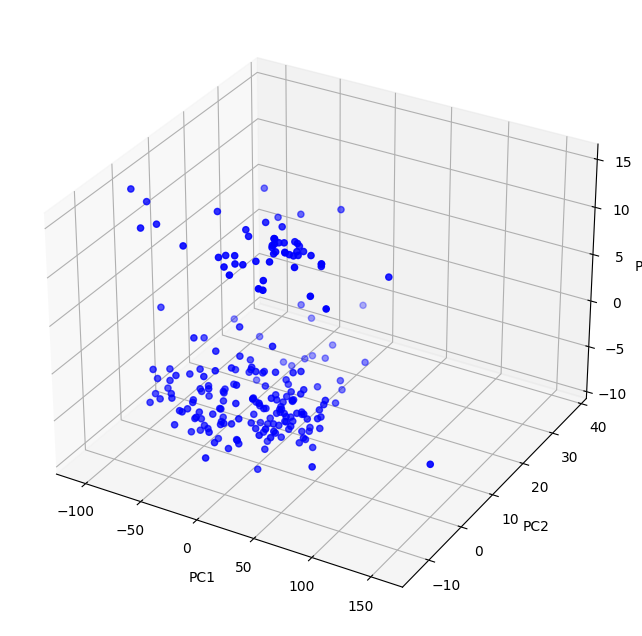

In [6]:
# Se grafican los datos en 3 dimensiones
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


#### Agrupamiento de Datos

In [7]:
# Se emplea el método del codo para determinar el número óptimo de clusters
distortions = []
inertias = []
distortionMap = {}
inertiaMap = {}
K = range(1, 10)

for k in K:
    # Creación y entrenamiento del modelo
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(df_pca)
    kmeanModel.fit(df_pca)

    distortions.append(sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca.shape[0])
    inertias.append(kmeanModel.inertia_)

    distortionMap[k] = sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca.shape[0]
    inertiaMap[k] = kmeanModel.inertia_


#### Valores de los Valores de la Distorción

In [8]:
for key, val in distortionMap.items():
    print(f'{key} : {val}')


1 : 31.376528816055465
2 : 19.87424373010445
3 : 16.876418185927985
4 : 14.55028867955872
5 : 13.745272355549957
6 : 12.694747704507787
7 : 11.425951768434278
8 : 10.408910337490449
9 : 9.731539011405898


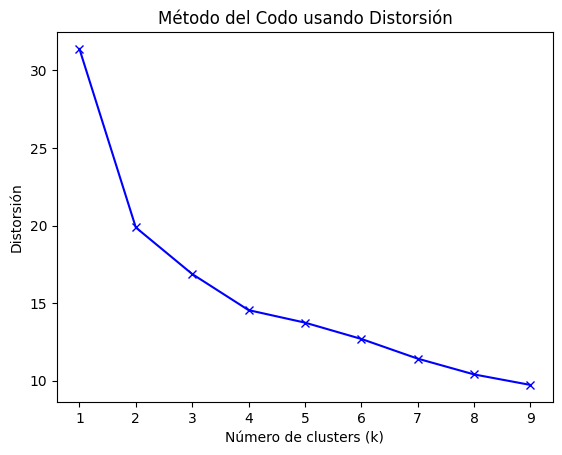

In [9]:
# Plot de los resultados, para observar el "codo"
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Método del Codo usando Distorsión')
plt.show()


#### Uso de los Valores de la Inercia

In [10]:
for key, val in inertiaMap.items():
    print(f'{key} : {val}')


1 : 314744.0772906776
2 : 128315.7215387027
3 : 90016.99101953962
4 : 65843.0683085974
5 : 53140.53607053145
6 : 43988.69191078789
7 : 36003.813168001194
8 : 32038.754674727803
9 : 27943.786309717536


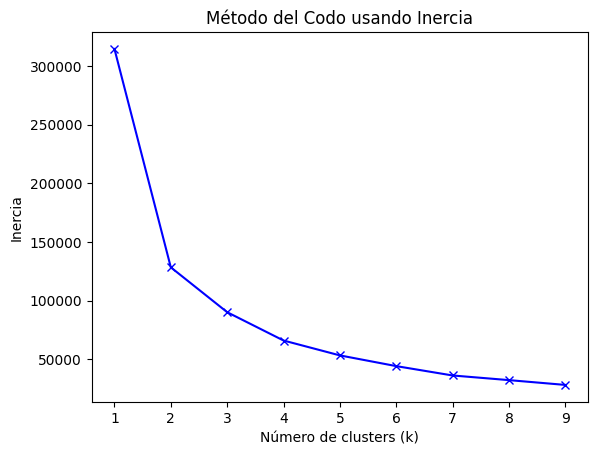

In [11]:
# Plot de los resultados, para observar el "codo"
plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo usando Inercia')
plt.show()


Para determinar el número apropiado de los clusters, se selecciona el valor de K en el "codo" del gráfico; es decir, el punto después del cual la distorsión o inercia comienzan a disminuir en una forma lineal. Por lo que se concluye que el número óptimo de en este caso es 5.

#### Visualización de los Clusters

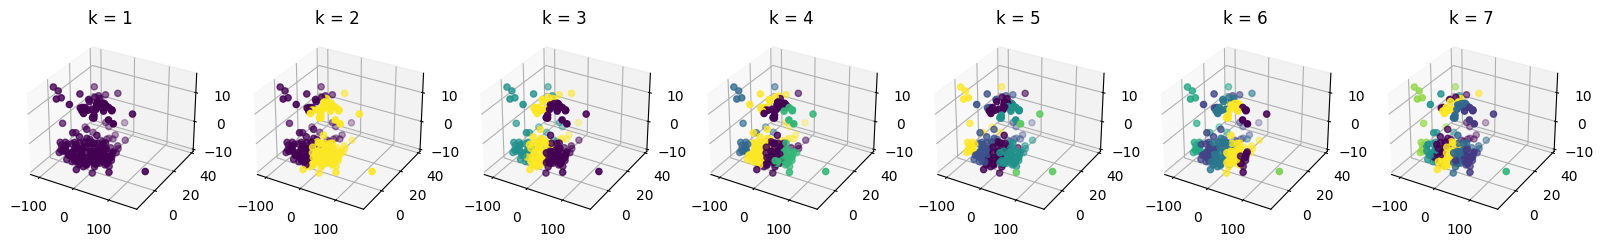

In [12]:
# Creación de un plot con 7 subplots, para observar los resultados de los
# modelos con diferentes valores de k
fig, axes = plt.subplots(1, 7, figsize=(20, 5), subplot_kw={'projection': '3d'})

for i, k in enumerate(range(1, 8)):
    # Creación y entrenamiento del modelo
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_pca)
    labels = model.labels_

    # Se grafican los datos en 3 dimensiones
    ax = axes[i]
    ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=labels)
    ax.set_title(f'k = {k}')

plt.show()


#### Creación del Modelo Híbrido

In [13]:
# Atributos de entrada
input_features = ['Edad', 'Altura', 'Peso', 'acceso', 'experiencia_cardio', 'experiencia_fuerza']


In [14]:
# Atributo de salida
recomendaciones = ['Brazos', 'Piernas', 'Espalda', 'Pecho', 'Abdomen', 'Cardio', 'Cuerpo en general']


In [15]:
# Se obtienen los datos de entrada y salida
X = df[input_features]
# Como se usará un modelo no supervisado, se omiten los datos de salida
# y = df[recomendaciones]


In [16]:
# Se separan los datos en entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [17]:
# Creación y entrenamiento del modelo
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(X_train)


KMeans(n_clusters=5, n_init=10)

In [18]:
# Uso del modelo de K-Means para asignar los clusters a los sets de datos de entrenamiento y prueba
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)


In [19]:
# Uso de PCA para reducir la dimensionalidad de los datos en 3 dimensiones
pca = PCA(n_components=3, random_state=42)
train_pca = pca.fit_transform(X_train)
test_pca = pca.transform(X_test)


In [20]:
# Conversión de train_pca de valores continuos a valores discretos
new_train_pca = pd.DataFrame(train_pca, columns=['PC1', 'PC2', 'PC3'])
new_train_pca['cluster'] = train_clusters
new_train_pca['cluster'] = new_train_pca['cluster'].astype('category')
new_train_pca.head()

,PC1,PC2,PC3,cluster
0,15.479714,-1.369365,0.131806,2
1,-4.236714,-8.257074,-0.422109,2
2,55.441213,0.438909,0.795152,0
3,27.464393,-0.840899,-0.660248,0
4,17.388748,0.727226,0.275743,2


In [21]:
# Creación y entrenamiento del modelo de árbol de decisión con los clusters
# obtenidos por el modelo de K-Means
tree = DecisionTreeClassifier(random_state=42)
tree.fit(train_clusters.reshape(-1, 1), new_train_pca['cluster'])


DecisionTreeClassifier(random_state=42)

In [22]:
# Evaluación del modelo de árbol de decisión
predictions = tree.predict(test_clusters.reshape(-1, 1))
accuracy_score(test_clusters, predictions)


1.0

In [23]:
# Función para obtener la recomencación de ejercicio con base en los datos de entrada
def get_recommendation(age, height, weight, gender, gym_access, strength_exp, cardio_exp, time_available, training_goal, training_preference, training_intensity):
    # Definición de los atributos de entrada
    input_features = ['Edad', 'Altura', 'Peso', 'acceso',
                      'experiencia_cardio', 'experiencia_fuerza']

    # Creación y entrenamiento del modelo de K-Means
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(df[input_features])

    # Uso del modelo de K-Means para asignar los clusters a los datos de entrada
    input_data = pd.DataFrame({
        'Edad': [age],
        'Altura': [height],
        'Peso': [weight],
        'acceso': [gym_access],
        'experiencia_cardio': [cardio_exp],
        'experiencia_fuerza': [strength_exp]
    })
    input_cluster = kmeans.predict(input_data)

    # Creación y entrenamiento del modelo de árbol de decisión con los clusters
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(train_clusters.reshape(-1, 1), new_train_pca['cluster'])

    # Predicción de la recomendación
    recommendation = tree.predict(input_cluster.reshape(-1, 1))[0]

    # Mapeo de los clusters a las recomendaciones
    cluster_map = {
        0: 'Brazos',
        1: 'Piernas',
        2: 'Espalda',
        3: 'Pecho',
        4: 'Abdomen',
        5: 'Cardio',
        6: 'Cuerpo en general'
    }

    return cluster_map[recommendation]


In [24]:
recommendation = get_recommendation(22, 173, 150, 'Masculino', True, False, True, '1', '1', '1', '1')
recommendation


c:\Users\Gabo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'Espalda'